# Top Seller Fashion Segmentation


Fashion retail has a large and ever-increasing popularity and relevance, allowing customers to buy anytime finding the best offers and providing satisfactory experiences in the shops. Consequently, Customer Relationship Management solutions have been enhanced by means of several technologies to better understand the behaviour and requirements of customers, engaging and influencing them to improve their shopping experience, as well as increasing the retailers’ profitability. Current solutions on marketing provide a too general approach, pushing and suggesting on most cases, the popular or most purchased items, losing the focus on the customer centricity and personality. <br>


In this task, you are required to perform a clustering algorithms based on top seller and total product listed. Write your findings and conclusion.

# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import dataset

In [3]:
ds = pd.read_csv('countries_with_top_sellers_fashion_c2c.csv')

# Data Exploration

In [ ]:
ds.head() #display first five row

,country,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,Taiwan,1,1,100.0,100.0,100.0,1,0,1,0,...,57.00,56.00,57.000000,56.000000,11.0,11.0,83.0,8.0,83.0,8.0
1,Slovaquie,2,1,50.0,0.0,0.0,0,2,0,1,...,27.00,14.00,14.000000,7.000000,17.0,15.0,10.5,8.5,15.0,8.0
2,Lettonie,4,2,50.0,100.0,100.0,4,0,2,0,...,40.50,18.00,20.750000,9.000000,120.3,11.5,21.0,52.3,38.0,98.5
3,Bulgarie,9,4,44.4,66.7,100.0,6,3,4,0,...,36.25,17.25,18.888889,9.111111,98.3,19.0,28.6,31.6,46.3,19.0
4,Chypre,4,1,25.0,100.0,100.0,4,0,1,0,...,41.00,66.00,14.000000,20.250000,17.3,11.0,21.3,10.3,39.0,17.0


In [4]:
ds.describe() #summary

,sellers,topsellers,topsellerratio,femalesellersratio,topfemalesellersratio,femalesellers,malesellers,topfemalesellers,topmalesellers,countrysoldratio,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,99.578947,6.631579,20.968421,78.778947,80.963158,75.368421,24.210526,5.105263,1.526316,2.032632,...,50.026688,30.124714,12.966926,8.582865,122.631579,23.757895,19.752632,17.389474,55.310526,56.389474
std,178.948570,9.804820,24.430174,22.167182,26.052025,131.976097,47.390317,7.194865,2.874571,1.616621,...,34.374679,19.263995,13.502800,12.208144,73.153940,20.889453,17.128448,14.551552,36.883012,103.303425
min,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690000,...,20.000000,0.000000,3.722222,1.142857,11.000000,11.000000,7.000000,8.000000,15.000000,3.000000
25%,6.000000,1.000000,6.450000,74.300000,71.800000,5.500000,0.500000,1.000000,0.000000,1.230000,...,28.500000,18.500000,5.167766,2.930594,62.600000,11.000000,10.800000,8.700000,36.650000,8.550000
50%,13.000000,2.000000,10.100000,78.700000,85.700000,10.000000,3.000000,1.000000,1.000000,1.590000,...,41.000000,21.380952,8.126801,5.500000,121.600000,12.700000,15.100000,10.200000,46.300000,14.500000
75%,112.000000,5.500000,22.500000,92.850000,100.000000,88.000000,24.000000,4.500000,1.000000,2.015000,...,56.700000,39.500000,14.000000,7.109375,172.800000,28.500000,20.400000,19.750000,58.300000,36.500000
max,713.000000,35.000000,100.000000,100.000000,100.000000,523.000000,190.000000,23.000000,12.000000,7.310000,...,170.000000,71.333333,57.000000,56.000000,266.100000,79.400000,83.000000,54.600000,167.000000,429.300000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 19 non-null     object 
 1   sellers                 19 non-null     int64  
 2   topsellers              19 non-null     int64  
 3   topsellerratio          19 non-null     float64
 4   femalesellersratio      19 non-null     float64
 5   topfemalesellersratio   19 non-null     float64
 6   femalesellers           19 non-null     int64  
 7   malesellers             19 non-null     int64  
 8   topfemalesellers        19 non-null     int64  
 9   topmalesellers          19 non-null     int64  
 10  countrysoldratio        19 non-null     float64
 11  bestsoldratio           19 non-null     float64
 12  toptotalproductssold    19 non-null     int64  
 13  totalproductssold       19 non-null     int64  
 14  toptotalproductslisted  19 non-null     int6

In [6]:
ds.dtypes

country                    object
sellers                     int64
topsellers                  int64
topsellerratio            float64
femalesellersratio        float64
topfemalesellersratio     float64
femalesellers               int64
malesellers                 int64
topfemalesellers            int64
topmalesellers              int64
countrysoldratio          float64
bestsoldratio             float64
toptotalproductssold        int64
totalproductssold           int64
toptotalproductslisted      int64
totalproductslisted         int64
topmeanproductssold       float64
topmeanproductslisted     float64
meanproductssold          float64
meanproductslisted        float64
meanofflinedays           float64
topmeanofflinedays        float64
meanfollowers             float64
meanfollowing             float64
topmeanfollowers          float64
topmeanfollowing          float64
dtype: object

In [7]:
ds.isnull().sum()

country                   0
sellers                   0
topsellers                0
topsellerratio            0
femalesellersratio        0
topfemalesellersratio     0
femalesellers             0
malesellers               0
topfemalesellers          0
topmalesellers            0
countrysoldratio          0
bestsoldratio             0
toptotalproductssold      0
totalproductssold         0
toptotalproductslisted    0
totalproductslisted       0
topmeanproductssold       0
topmeanproductslisted     0
meanproductssold          0
meanproductslisted        0
meanofflinedays           0
topmeanofflinedays        0
meanfollowers             0
meanfollowing             0
topmeanfollowers          0
topmeanfollowing          0
dtype: int64

# Visualize your data

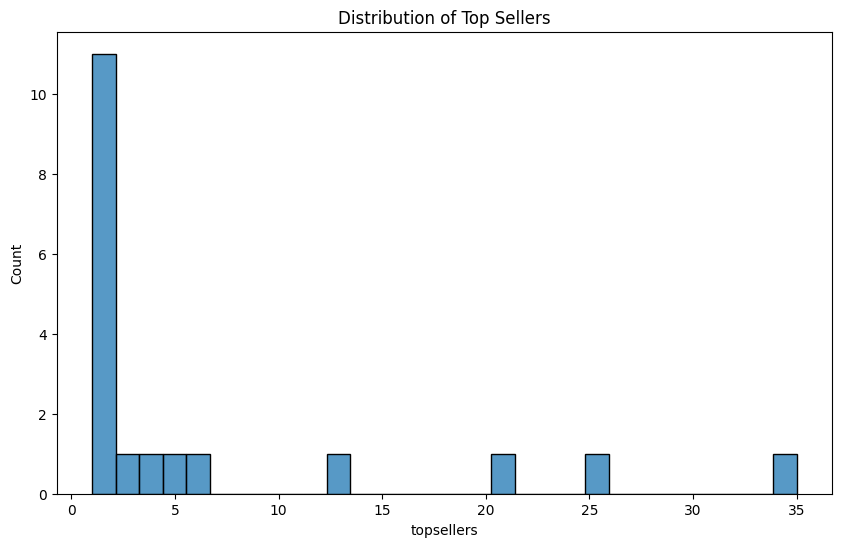

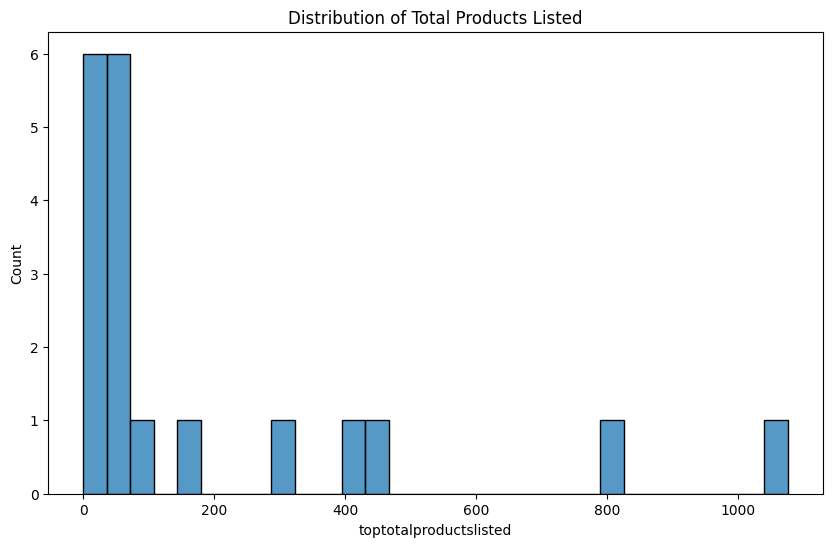

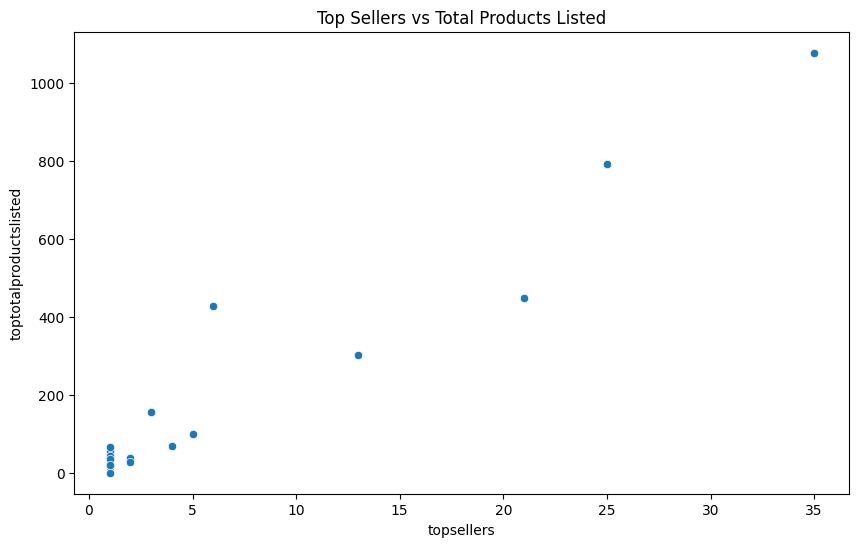

In [8]:
# Histogram for 'topsellers'
plt.figure(figsize=(10,6))
sns.histplot(data=ds, x='topsellers', bins=30)
plt.title('Distribution of Top Sellers')
plt.show()

# Histogram for 'toptotalproductslisted'
plt.figure(figsize=(10,6))
sns.histplot(data=ds, x='toptotalproductslisted', bins=30)
plt.title('Distribution of Total Products Listed')
plt.show()

# Scatter plot for 'topsellers' vs 'toptotalproductslisted'
plt.figure(figsize=(10,6))
sns.scatterplot(data=ds, x='topsellers', y='toptotalproductslisted')
plt.title('Top Sellers vs Total Products Listed')
plt.show()



*   Based on the scatter plot, there is no strong correlation between the number of top sellers and the total products listed. Most of the data points are concentrated towards the lower left corner of the plot, possibly because most of the top sellers have a low to moderate number of products listed.

* However, there are a few outliers, especially one data point near on top of the graph. There is a top seller who has a significantly higher number of total products listed compared to others.

* While there are a few top sellers with a high number of products listed, the majority have fewer products listed. Therefore, we can see that a top seller is not necessarily need to have a variety of products, but perhaps it is more important on the fact of the quality of the products, marketing, customer service, or other factors.

# Slice dataset

2 topsellers<br>

15 totalproductslisted

In [10]:
#slice the data
X = ds.iloc[:, [0,2, 15]].values

# Print the selected data
print(X)

[['Taiwan' 1 56]
 ['Slovaquie' 1 14]
 ['Lettonie' 2 36]
 ['Bulgarie' 4 82]
 ['Chypre' 1 81]
 ['Monaco' 1 26]
 ['Roumanie' 2 77]
 ['Luxembourg' 1 8]
 ['Espagne' 13 594]
 ['Italie' 35 2218]
 ['Croatie' 1 69]
 ['Hong Kong' 1 55]
 ['Suède' 3 231]
 ['Royaume-Uni' 21 927]
 ['Autriche' 1 37]
 ['Allemagne' 5 264]
 ['Etats-Unis' 6 816]
 ['Pays-Bas' 2 139]
 ['France' 25 1892]]


# Normalize dataset

In [11]:
from sklearn.preprocessing import StandardScaler

# Now you can use StandardScaler
ss = StandardScaler()
X = ds.iloc[:, [2, 15]].values
XX = ss.fit_transform(X)
print(XX)


[[-0.59010743 -0.54952639]
 [-0.59010743 -0.61639466]
 [-0.485322   -0.58136842]
 [-0.27575114 -0.50813176]
 [-0.59010743 -0.50972386]
 [-0.59010743 -0.59728944]
 [-0.485322   -0.51609226]
 [-0.59010743 -0.62594726]
 [ 0.66731775  0.3070242 ]
 [ 2.97259724  2.892597  ]
 [-0.59010743 -0.52882907]
 [-0.59010743 -0.5511185 ]
 [-0.38053657 -0.27090864]
 [ 1.5056012   0.83719399]
 [-0.59010743 -0.57977632]
 [-0.1709657  -0.21836929]
 [-0.06618027  0.66047073]
 [-0.485322   -0.41738197]
 [ 1.92474292  2.37357192]]


# Use elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

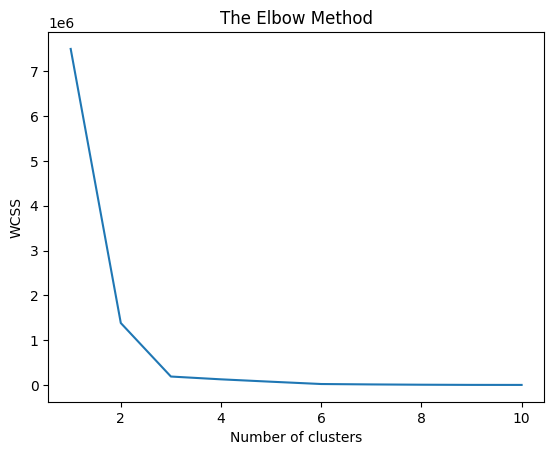

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimized number of clusters is 3.

# Clustering using Kmeans

3 clusters.

*   cluster 0
*   cluster 1
*   cluster 2

In [13]:
kmeans3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans3.fit_predict(XX)
y_kmeans3  #perform reverse engineering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1],
      dtype=int32)

In [14]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(XX)
y_kmeans2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


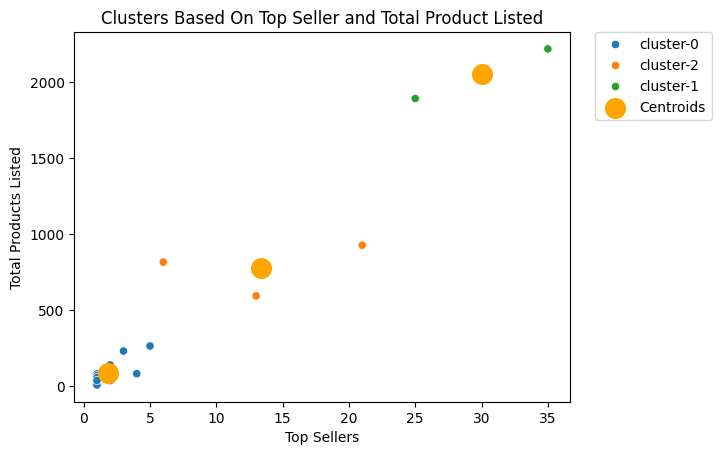

In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans3 = kmeans.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in y_kmeans3])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='orange', label='Centroids')
plt.title('Clusters Based On Top Seller and Total Product Listed')
plt.xlabel('Top Sellers')
plt.ylabel('Total Products Listed')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


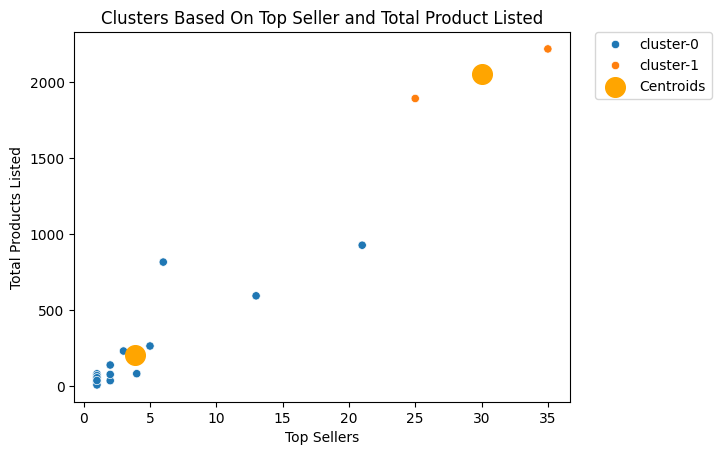

In [16]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans2 = kmeans.fit_predict(X)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in y_kmeans2])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='orange', label='Centroids')
plt.title('Clusters Based On Top Seller and Total Product Listed')
plt.xlabel('Top Sellers')
plt.ylabel('Total Products Listed')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.show()

# Clustering using Hierachical

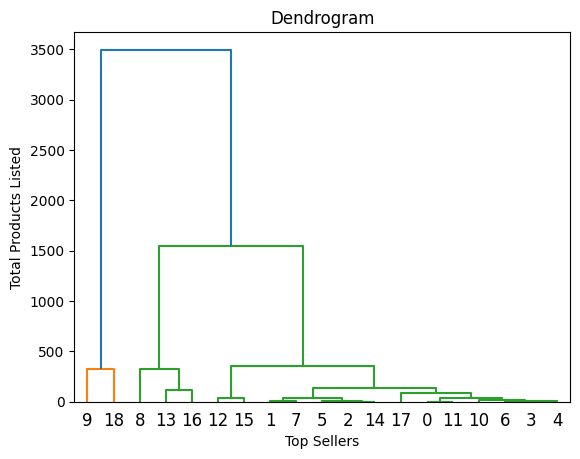

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Top Sellers')
plt.ylabel('Total Products Listed')
plt.show()

Using average, the optimal number of cluster is 2.

In [18]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Silhouette score

Silhouette Score in K-Mean Clustering for Number of cluster = 2 and 3

In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(XX, kmeans3.labels_, metric='euclidean')
print(score)

0.7429155534862316


In [21]:
from sklearn.metrics import silhouette_score

score2 = silhouette_score(XX, kmeans2.labels_, metric='euclidean')
print(score2)

0.7839587344859795


Silhouette Score in Hierachical Clustering for Number of cluster = 2



In [22]:
from sklearn.metrics import silhouette_score

# Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = cluster.fit_predict(X)

# Calculate Silhouette Score
score = silhouette_score(X, y_hc, metric='euclidean')

print(score)

0.8264978161083107


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Visualization after clustering

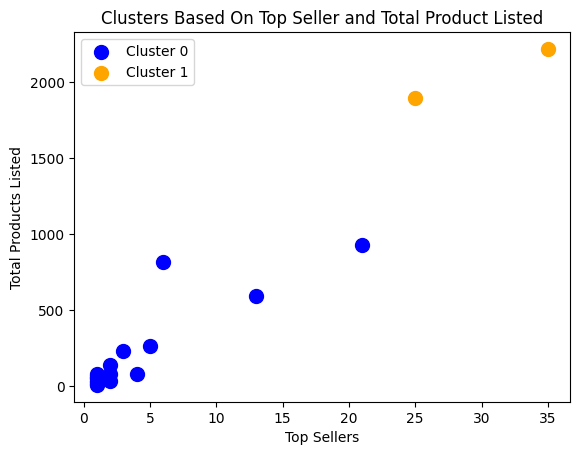

In [23]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'blue', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'orange', label = 'Cluster 1')

plt.title('Clusters Based On Top Seller and Total Product Listed')
plt.xlabel('Top Sellers')
plt.ylabel('Total Products Listed')
plt.legend()
plt.show()

# **Finding /Conclusion**

* This assessment perform data clustering using two different methods, K-means and Hierarchical clustering.

* Based on the elbow method (K-means), the optimal number of cluster is 3. However, to get better performance and result, the comparison betweem 2 cluster and 3 cluster is made.

* Based on the result of silhouette scores for the K-means model with 2 cluster and 3 cluster, the K-means model with 2 clusters is better as it scores 0.78 compared to 3 cluster at 0.74.

* However, these two scores are close to each others, the difference in cluster quality with the models is not too big. Also, both of the clusters are dense and very well separated.

* In hierarchical, using dendogram to find the optimal number of cluster through average aproach, the output is 2.

* During visualization, there are two groups of cluster:
1. Cluster 0 (Blue): Countries that have a high number of Top Sellers but a low Total Products Listed. These could be companies that focus on selling a few high-performing products.
2. Cluster 1 (Orange): Countries that have a lower number of Top Sellers but a high Total Products Listed. These could be companies with a wide range of products, but only a few of them are top sellers.

Most of the country belongs to Cluster 0, and less country belongs to cluster 1.

* In addition, both hierarchical clustering and K-means have high silhouette scores, both methods are good match on its clutering for this dataset.

* However, the silhoutte score for hierarchical clustering (0.83) is slightly higher than K-means (0.78). Meaning the hierarchical clustering did a slightly better job of assigning the data points to clusters.

* In conclusion, we can concluded that a top seller is not necessarily need to have a variety of products, but perhaps it is more important on the fact of the quality of the products, marketing, customer service, or other factors.
